# Multi-armed Bandits

**Evaluative feedback** provides training information based on the actions taken.

**Instructive feedback** provides the correct action to take, independent of the action actually taken.

Multi-armed bandits provide a simplified setting to see the evaluative feedback aspect of RL.


## 2.1 Context-free k-armed bandits

At each time step, you choose between k different actions. Afterward, you receive a reward from an unknown, but stationary probability distribution that depends on your action. Goal is to maximize the expected total reward over some time horizon.

Let's call the value of an action, $a$, the expected value of the reward given that action selection:

$$q_{*}(a)=E[R_t \mid A_t = a]$$

## 2.2 Action-value methods

Exercise 2.1: In $\epsilon$-greedy action selection, for the case of two actions and " = 0.5, what is the probability that the greedy action is selected?

**Answer:** 75%. Half of the time its chosen because as the greedy one. 50% of the time we choose randomly, and 50% of **those**,we'll choose the greedy action again.


## 2.3 The 10-armed Testbed

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Set the rng seed to get reproducible results.
np.random.seed(42)

class MultiArmedBanditProblem(object):
    def __init__(self, num_arms):
        self.true_action_values = np.random.randn(num_arms)
        
    def sample_reward(self, action, count=1):
        return np.random.randn(count) + self.true_action_values[action]

problem = MultiArmedBanditProblem(num_arms=10)
print("True action values:", problem.true_action_values)

True action values: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


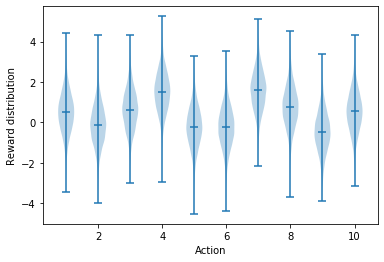

In [93]:
# Plotting the reward distributions for all of the actions
def display_reward_distribution(problem):
    reward_samples = [problem.sample_reward(i, count=10000) for i in range(len(TRUE_ACTION_VALUES))]
    plt.violinplot(reward_samples, showmeans=True)
    plt.xlabel("Action")
    plt.ylabel("Reward distribution")
    plt.show()
    

display_reward_distribution(problem)

In [104]:
class EpsilonGreedyPolicy(object):
    def __init__(self, actions, epsilon, initial_value=0.0):
        self.epsilon = epsilon
        self.initial_value = initial_value
        self.estimated_action_values = {action: initial_value for action in actions}
        self.num_samples = {action: 0 for action in actions}
    
    def select_action(self):
        """ Select the next action to take. """
        if np.random.rand() < self.epsilon:
            return np.random.choice(list(self.estimated_action_values.keys()))
        else:
            max_value, optimal_action = max((value, action) for action, value in self.estimated_action_values.items())
            return optimal_action
        
    def update(self, action, reward):
        """ Called when reward is received after choosing the given action. """
        self.num_samples[action] += 1
        self.estimated_action_values[action] += 1.0 / self.num_samples[action] * (reward - self.estimated_action_values[action])


In [95]:
def evaluate_policy_on_problem(policy: EpsilonGreedyPolicy, env: MultiArmedBanditProblem):
    rewards = []
    for i in range(1000):
        action = policy.select_action()
        reward = env.sample_reward(action)
        policy.update(action, reward)
        rewards.append(reward)
    
    return np.array(rewards)

def evaluate_policy(policy_generator, env_generator, num_runs=2000):
    rewards = []
    for i in range(num_runs):
        policy = policy_generator()
        env = env_generator()
        rewards.append(evaluate_policy_on_problem(policy, env))

    return np.mean(rewards, axis=0)

# Single sample
problem = MultiArmedBanditProblem(num_arms=10)
policy = EpsilonGreedyPolicy(actions=range(10), epsilon=0.1)
rewards = evaluate_policy_on_problem(policy, problem)


avg_rewards ={}
avg_rewards[0.1] = evaluate_policy(lambda: EpsilonGreedyPolicy(actions=range(10), epsilon=0.1), lambda: MultiArmedBanditProblem(num_arms=10), num_runs=2000)
avg_rewards[0.01] = evaluate_policy(lambda: EpsilonGreedyPolicy(actions=range(10), epsilon=0.01), lambda: MultiArmedBanditProblem(num_arms=10), num_runs=2000)
avg_rewards[0.0] = evaluate_policy(lambda: EpsilonGreedyPolicy(actions=range(10), epsilon=0.00), lambda: MultiArmedBanditProblem(num_arms=10), num_runs=2000)

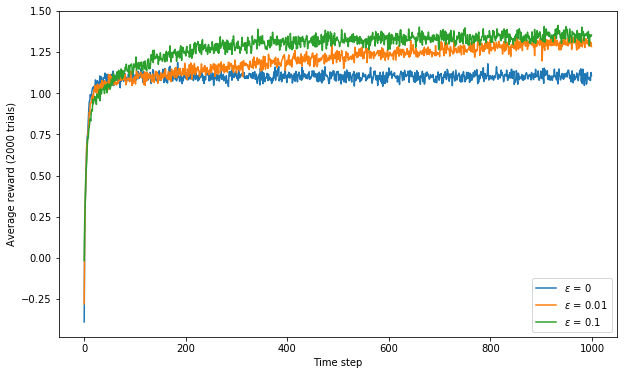

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards[0])
plt.plot(avg_rewards[0.01])
plt.plot(avg_rewards[0.1])
plt.legend([r"$\epsilon$ = 0", r"$\epsilon$ = 0.01", r"$\epsilon$ = 0.1"])
plt.xlabel("Time step")
plt.ylabel("Average reward (2000 trials)")
plt.show()

**Exercise 2.2:**

Bandit example Consider a k-armed bandit problem with k = 4 actions,
denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using
"-greedy action selection, sample-average action-value estimates, and initial estimates
of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1,
R1 = 1, A2 = 2, R2 = 1, A3 = 2, R3 = 2, A4 = 2, R4 = 2, A5 = 3, R5 = 0. On some
of these time steps the $\epsilon$ case may have occurred, causing an action to be selected at
random. On which time steps did this definitely occur? On which time steps could this
possibly have occurred?

In [105]:
policy = EpsilonGreedyPolicy(actions=[1, 2, 3, 4], epsilon=0)
policy.update(action=1, reward=-1)
print(policy.estimated_action_values, " selected action = 2")
policy.update(action=2, reward=1)
print(policy.estimated_action_values, " selected action = 2")
policy.update(action=2, reward=-2)
print(policy.estimated_action_values, " selected action = 2")
policy.update(action=2, reward=2)
print(policy.estimated_action_values, " selected action = 3")
policy.update(action=3, reward=0)

{1: -1.0, 2: 0.0, 3: 0.0, 4: 0.0}  selected action = 2
{1: -1.0, 2: 1.0, 3: 0.0, 4: 0.0}  selected action = 2
{1: -1.0, 2: -0.5, 3: 0.0, 4: 0.0}  selected action = 2
{1: -1.0, 2: 0.33333333333333326, 3: 0.0, 4: 0.0}  selected action = 3


The $\epsilon$ case definitely happend on the 5th timestep, since the highest value estimate was for action 2, but we chose 3. It could have possibly occurred on *any* timestep since the greedy option is also included in the set of options for the random action case (as $\epsilon$-greedy policies are typically formulated).

